影像高度: 768, 影像寬度: 1024


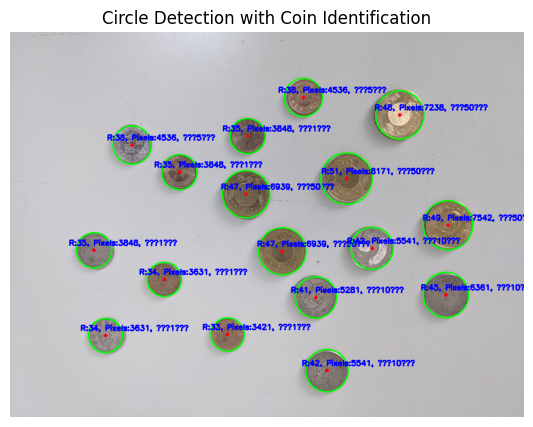

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 定義 classify_coin 函式
def classify_coin(area):
    """
    根據圓面積分類硬幣。
    :param area: 圓的面積
    :return: 硬幣名稱（如 1元, 5元, 10元, 50元）
    """
    if area < 4000:
        return "1元"
    elif 4000 <= area < 5200:
        return "5元"
    elif 5200 <= area <= 6500:
        return "10元"
    elif area > 6500:
        return "50元"

# 載入影像
image_path = "/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/001.bmp"  # 替換為實際影像路徑
image = cv2.imread(image_path)

# 讀取照片的 row 和 col
rows = image.shape[0]  # 高度
cols = image.shape[1]  # 寬度
print(f"影像高度: {rows}, 影像寬度: {cols}")

# 轉換為灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊處理
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# 使用霍夫圓檢測
# dp: 累加器解析度相對於輸入影像的倒數
# minDist: 圓心之間的最小距離
# param1: Canny 邊緣檢測的高閾值
# param2: 累加器閾值，數值越低檢測越寬鬆（容易誤檢）
# minRadius: 要檢測的圓的最小半徑
# maxRadius: 要檢測的圓的最大半徑
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT,
                           dp=1.2,          # 累加器解析度
                           minDist=80,      # 圓心之間的最小距離
                           param1=80,       # Canny 邊緣檢測的高閾值
                           param2=40,       # 圓心檢測的累加器閾值
                           minRadius=10,    # 最小半徑
                           maxRadius=100)   # 最大半徑

# 複製影像作為輸出影像
output = image.copy()

if circles is not None:
    # 圓的座標轉為整數
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # 畫出圓形與圓心
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # 綠色圓形
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # 紅色圓心

        # 計算圓內的像素數量（面積）
        circle_area = int(np.pi * (r ** 2))

        # 根據面積分類硬幣
        coin = classify_coin(circle_area)

        # 標註半徑與圓內像素數量
        text = f"R:{r}, Pixels:{circle_area}, 是{coin}"
        cv2.putText(output, text, (x - 50, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 2)  # 藍色文字

# 顯示結果
plt.figure(figsize=(10, 5))
plt.title("Circle Detection with Coin Identification")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


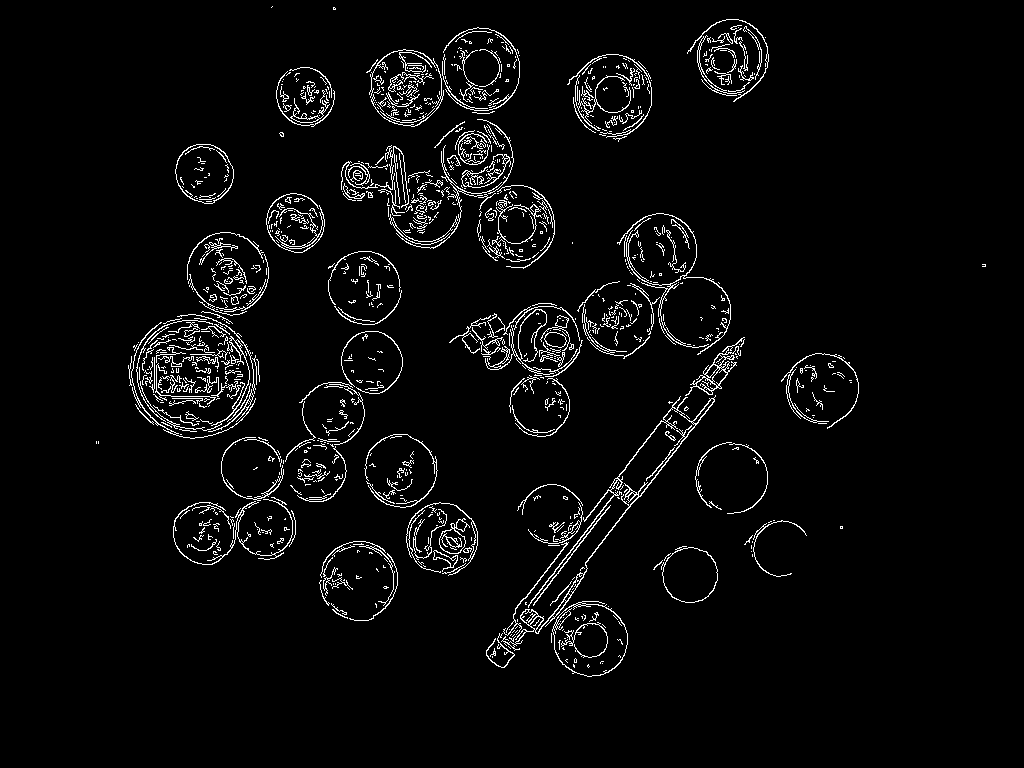

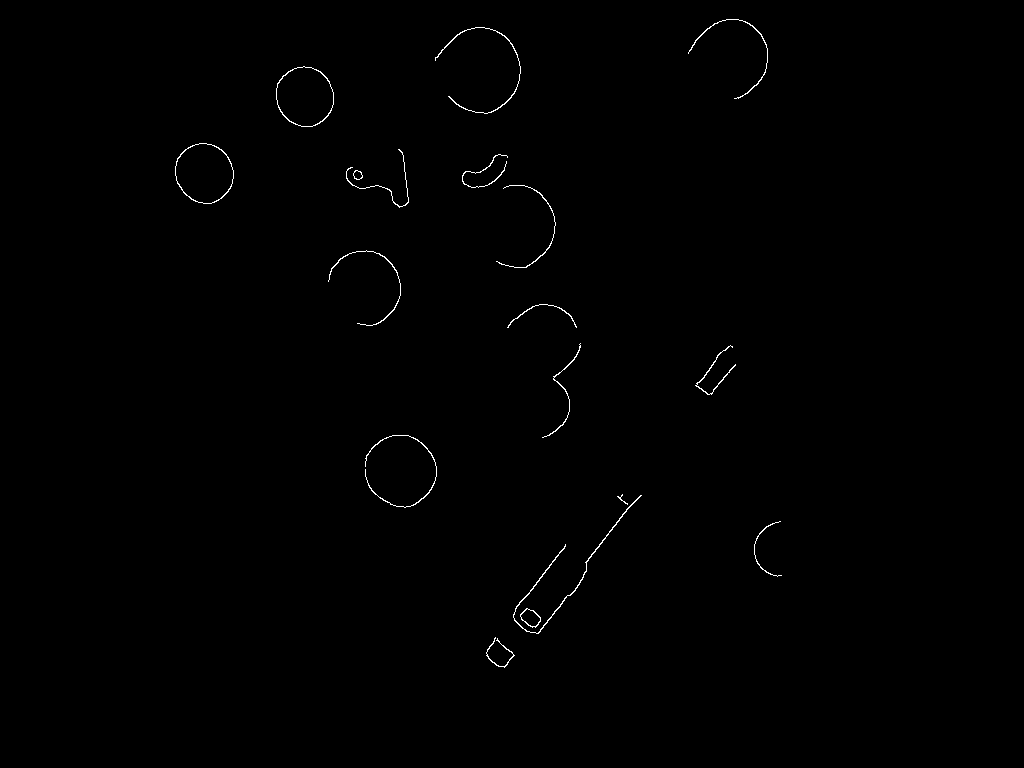

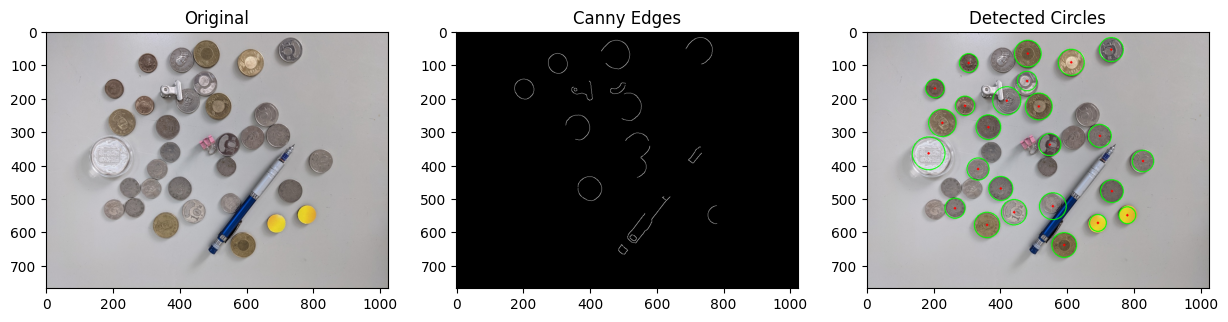

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import google.colab.patches as colab

# 讀取影像
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/010.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 測試原圖片的檢測狀況
edge_test = cv2.Canny(gray,100, 200) #Use Canny to find edge
colab.cv2_imshow(edge_test)

# 應用高斯模糊
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# 邊緣檢測 (Canny) edges = cv2.Canny(image, threshold1, threshold2)
edges = cv2.Canny(blurred, 80, 200)
colab.cv2 = colab.cv2_imshow(edges)

# 使用霍夫圓檢測
# dp: 累加器解析度相對於輸入影像的倒數
# minDist: 圓心之間的最小距離
# param1: Canny 邊緣檢測的高閾值
# param2: 累加器閾值，數值越低檢測越寬鬆（容易誤檢）
# minRadius: 要檢測的圓的最小半徑
# maxRadius: 要檢測的圓的最大半徑
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT,
                           dp=1.2,          # 累加器解析度
                           minDist=80,      # 圓心之間的最小距離
                           param1=80,       # Canny 邊緣檢測的高閾值
                           param2=40,       # 圓心檢測的累加器閾值
                           minRadius=10,    # 最小半徑
                           maxRadius=50)   # 最大半徑

# 複製影像進行標記
output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        x, y, radius = i
        # 繪製圓形
        cv2.circle(output, (x, y), radius, (0, 255, 0), 2)
        # 繪製圓心
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

# 顯示結果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.title("Original"), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2), plt.title("Canny Edges"), plt.imshow(edges, cmap="gray")
plt.subplot(1, 3, 3), plt.title("Detected Circles"), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()


未模糊的邊緣檢測：


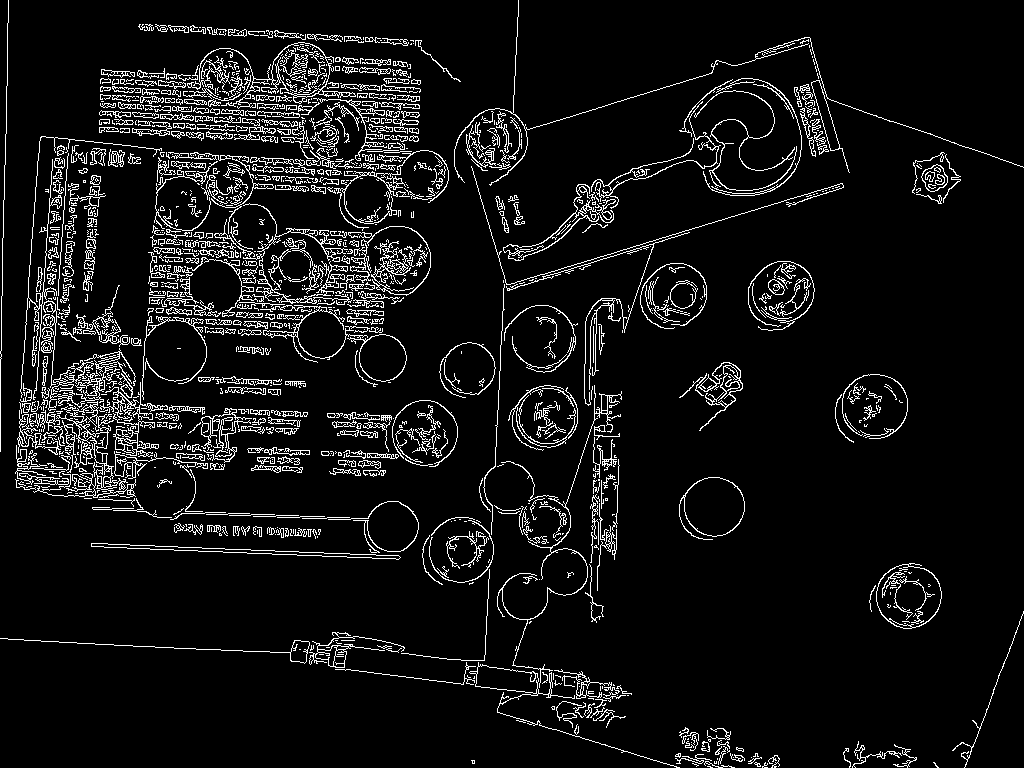

模糊後的邊緣檢測：


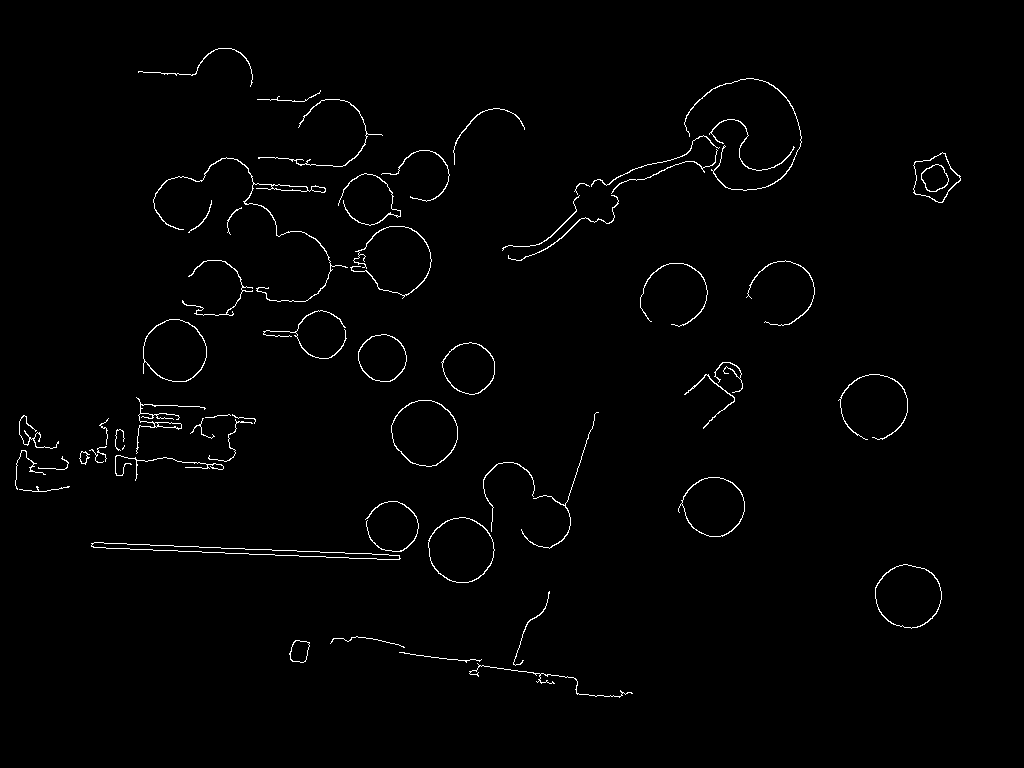

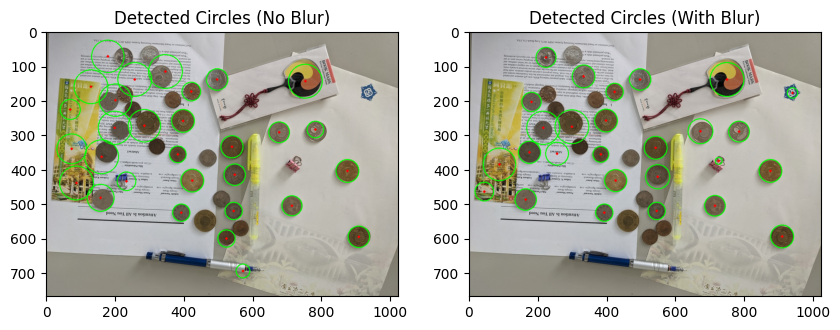

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import google.colab.patches as colab

# 讀取影像並轉換為灰階
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/專題_錢幣辨識/004.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **未模糊的邊緣檢測與圓檢測**
# 邊緣檢測
edges_no_blur = cv2.Canny(gray, 40, 200)

# 霍夫圓檢測 (未模糊)
circles_with_blur = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=80,
    param1=80,
    param2=30,
    minRadius=10,
    maxRadius=50
)

# 標記未模糊的檢測結果
output_no_blur = image.copy()
if circles_no_blur is not None:
    circles_no_blur = np.uint16(np.around(circles_no_blur))
    for i in circles_no_blur[0, :]:
        x, y, radius = i
        cv2.circle(output_no_blur, (x, y), radius, (0, 255, 0), 2)  # 綠色圓形
        cv2.circle(output_no_blur, (x, y), 2, (0, 0, 255), 3)       # 紅色圓心

# **經過高斯模糊的邊緣檢測與圓檢測**
# 高斯模糊
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# 邊緣檢測
edges_with_blur = cv2.Canny(blurred, 40, 200)

# 使用霍夫圓檢測
# 步驟 5: 應用霍夫圓檢測，在邊緣圖中尋找圓形結構
# 參數說明：
# - dp: 累加器解析度相對於輸入影像的倒數，dp=1.2 表示解析度為原影像的 1/1.2
# - minDist: 圓心之間的最小距離，避免檢測出過多重疊的圓
# - param1: Canny 邊緣檢測的高閾值，用於邊緣檢測的內部操作
# - param2: 圓心檢測的累加器閾值，數值越低檢測越寬鬆
# - minRadius/maxRadius: 限制檢測圓的半徑範圍，避免檢測到過小或過大的圓
# 霍夫圓檢測 (模糊後)
circles_with_blur = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=80,
    param1=80,
    param2=30,
    minRadius=10,
    maxRadius=50
)

# 標記模糊後的檢測結果
output_with_blur = image.copy()
if circles_with_blur is not None:
    circles_with_blur = np.uint16(np.around(circles_with_blur))
    for i in circles_with_blur[0, :]:
        x, y, radius = i
        cv2.circle(output_with_blur, (x, y), radius, (0, 255, 0), 2)  # 綠色圓形
        cv2.circle(output_with_blur, (x, y), 2, (0, 0, 255), 3)       # 紅色圓心

# **顯示結果**
# 比較邊緣檢測結果
print("未模糊的邊緣檢測：")
colab.cv2_imshow(edges_no_blur)
print("模糊後的邊緣檢測：")
colab.cv2_imshow(edges_with_blur)

# 比較霍夫圓檢測結果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Detected Circles (No Blur)")
plt.imshow(cv2.cvtColor(output_no_blur, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Detected Circles (With Blur)")
plt.imshow(cv2.cvtColor(output_with_blur, cv2.COLOR_BGR2RGB))
plt.show()
